....................................................................................................................................................................................................................................................
# Overview + Pre-work
....................................................................................................................................................................................................................................................

Data Analysis: Financial Well-Being Survey (CFPB, 2017)

### Problem statement

What relationship is there between a population’s education levels and financial well-being, measured in indicators like debt to income rate and home ownership ability?

### Objectives
* Does education level have any relationship with a population's financial well-being, as measured by different indicators?
* Are there differences among the different education levels? Is there a possible explanation or reasoning for such differences or lack of differences?
* Are there additional factors involved in these observations? Is there additional data we can explore?
* What conclusions can we draw?
* Are there any recommendations we can make to public and private institutions to efficiently allocate resources to make the largest difference for the groups observed?

### Importing data and values

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

cfpb_df = pd.read_csv("/data/workspace_files/NFWBS_PUF_2016_data.csv")

# Columns that most relate to our problem statement
columns_of_interest = [
    'PUF_ID',
    'agecat',
    'PPEDUC',
    'PPETHM',
    'PPGENDER',
    'PPINCIMP',
    'PPHHSIZE',
    'fpl',
    'PPREG4',
    'PPREG9',
    'FWB1_1',
    'FWB1_5',
    'FS2_3',
    'SUBKNOWL1',
    'ACT1_2',
    'PROPPLAN_3',
    'PROPPLAN_1',
    'MANAGE1_2',
    'MANAGE1_1',
    'MANAGE1_3',
    'SAVEHABIT',
    'AUTOMATED_1',
    'AUTOMATED_2',
    'SAVINGSRANGES',
    'HOUSING',
    'HOUSERANGES',
    'MORTGAGE',
    'PRODHAVE_8',
    'PRODUSE_1',
    'PRODUSE_2',
    'FWBscore',
    'FSscore'
]

# Value mapping to actual responses; might come in handy when doing EDA
value_map = {
    "agecat":{
      1: "18-24",
      2: "25-34",
      3: "35-44",
      4: "45-54",
      5: "55-61",
      6: "62-69",
      7: "70-74",
      8: "75+"
    },
    "PPEDUC":{
      1: "Less than high school",
      2: "High school degree/GED",
      3: "Some college/Associate",
      4: "Bachelors degree",
      5: "Graduate/professional degree"
    },
    "PPETHM":{
      1: "White, Non-Hispanic",
      2: "Black, Non-Hispanic",
      3: "Other, Non-Hispanic",
      4: "Hispanic"
    },
    "PPGENDER":{
      1: "Male",
      2: "Female"
    },
    "PPINCIMP":{
      1: "Less than \$20,000",
      2: "\$20,000 to \$29,999",
      3: "\$30,000 to \$39,999",
      4: "\$40,000 to \$49,999",
      5: "\$50,000 to \$59,999",
      6: "\$60,000 to \$74,999",
      7: "\$75,000 to \$99,999",
      8: "\$100,000 to \$149,999",
      9: "\$150,000 or more"
    },
    "PPHHSIZE":{
      1: "1",
      2: "2",
      3: "3",
      4: "4",
      5: "5+"
    },
    "fpl":{
      1: "<100% FPL",
      2: "100%-199% FPL",
      3: "200%+ FPL"
    },
    "PPREG4":{
      1: "Northeast",
      2: "Midwest",
      3: "South",
      4: "West"
    },
    "PPREG9":{
      1: "New England",
      2: "Mid-Atlantic",
      3: "East-North Central",
      4: "West-North Central",
      5: "South Atlantic",
      6: "East-South Central",
      7: "West-South Central",
      8: "Mountain",
      9: "Pacific"
    },
    "FWB1_1":{
      -4: "Response not written to database",
      -1: "Refused",
      1: "Not at all",
      2: "Very little",
      3: "Somewhat",
      4: "Very well",
      5: "Completely"
    },
    "FWB1_5":{
      -4: "Response not written to database",
      -1: "Refused",
      1: "Not at all",
      2: "Very little",
      3: "Somewhat",
      4: "Very well",
      5: "Completely"
    },
    "FS2_3":{
      -1: "Refused",
      1: "Never",
      2: "Rarely",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "SUBKNOWL1":{
      -1: "Refused",
      1: "1 - Very low",
      2: "2",
      3: "3",
      4: "4",
      5: "5",
      6: "6",
      7: "7 - Very high"
    },
    "ACT1_2":{
      -1: "Refused",
      1: "Not at all",
      2: "Very little",
      3: "Somewhat",
      4: "Very well",
      5: "Completely"
    },
    "PROPPLAN_1":{
      -1: "Refused",
      1: "Strongly disagree",
      2: "Disagree",
      3: "Neither agree nor disagree",
      4: "Agree",
      5: "Strongly agree"
    },
    "PROPPLAN_3":{
      -1: "Refused",
      1: "Strongly disagree",
      2: "Disagree",
      3: "Neither agree nor disagree",
      4: "Agree",
      5: "Strongly agree"
    },
    "MANAGE1_1":{
      -1: "Refused",
      1: "Not applicable or never",
      2: "Seldom",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "MANAGE1_2":{
      -1: "Refused",
      1: "Not applicable or never",
      2: "Seldom",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "MANAGE1_3":{
      -1: "Refused",
      1: "Not applicable or never",
      2: "Seldom",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "SAVEHABIT":{
      -1: "Refused",
      1: "Strongly disagree",
      2: "Disagree",
      3: "Disagree slightly",
      4: "Agree slightly",
      5: "Agree",
      6: "Strongly agree"
    },
    "AUTOMATED_1":{
      -1: "Refused",
      0: "No",
      1: "Yes",
      7: "I do not have this type of account"
    },
    "AUTOMATED_2":{
      -1: "Refused",
      0: "No",
      1: "Yes",
      7: "I do not have this type of account"
    },
    "SAVINGSRANGES":{
      -1: "Refused",
      1: "0",
      2: "$1-99",
      3: "$100-999",
      4: "$1,000-4,999",
      5: "$5,000-19,999",
      6: "$20,000-74,999",
      7: "$75,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },
    "HOUSING":{
      -1: "Refused",
      1: "I own my home",
      2: "I rent",
      3: "I do not currently own or rent"
    },
    "HOUSERANGES":{
      -1: "Refused",
      1: "Less than $300",
      2: "$300-499",
      3: "$500-749",
      4: "$750-999",
      5: "$1,000-1,499",
      6: "$1,500-1,999",
      7: "$2,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },
    "MORTGAGE":{
      -2: "Question not asked because respondent not in item base",
      -1: "Refused",
      1: "Less than $50,000",
      2: "$50,000-199,999",
      3: "$200,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },
    "PRODHAVE_8":{
      0: "No",
      1: "Yes"
    },
    "PRODUSE_1":{
      0: "No",
      1: "Yes"
    },
    "PRODUSE_2":{
      0: "No",
      1: "Yes"
    },
    "FWBscore":{
      -4: "Response not written to database",
      -1: "Refused"
    },
    "FSscore":{
      -1: "Refused"
    },
}

# Column mapping to variable label; might come in handy when doing EDA
col_map = {
    'agecat':'Age Group',
    'PPEDUC':'Education (Highest Degree)',
    'PPETHM':'Race/Ethnicity',
    'PPGENDER':'Gender',
    'PPINCIMP':'Household Income',
    'PPHHSIZE':'Household Size',
    'fpl':'Federal Poverty Level',
    'PPREG4':'Census Region',
    'PPREG9':'Census Division',
    'FWB1_1':'I could handle a major unexpected expense.',
    'FWB1_5':'I am just getting by financially',
    'FS2_3':'I struggle to understand financial information',
    'SUBKNOWL1':'How would you assess your overall financial knowledge?',
    'ACT1_2':'I follow-through on financial goals I set for myself.',
    'PROPPLAN_3':'I set financial goals for what I want to achieve with my money',
    'PROPPLAN_1':'I consult my budget to see how much money I have left',
    'MANAGE1_2':'Stayed within your budget or spending plan',
    'MANAGE1_1':'Paid all your bills on time',
    'MANAGE1_3':'Paid off credit card balance in full',
    'SAVEHABIT':'Putting money into savings is a habit for me',
    'AUTOMATED_1':'A Retirement Savings Account',
    'AUTOMATED_2':'A Non-Retirement Savings Account',
    'SAVINGSRANGES':'How much money do you have in savings today?',
    'HOUSING':'Which one of the following best describes your housing situation?',
    'HOUSERANGES':'About how much do you pay for your home each month?',
    'MORTGAGE':'What do you owe on your home?',
    'PRODHAVE_8':'Student/Education Loan (for yourself or someone else)',
    'PRODUSE_1':'Used payday loan or cash advance loan',
    'PRODUSE_2':'Used pawn loan or auto title loan',
    'FWBscore':'Financial Well-Being Scale score',
    'FSscore':'Financial Skill Scale score'
}

In [2]:
cfpb_filtered_df = cfpb_df.loc[:,columns_of_interest]
cfpb_filtered_df.head()

,PUF_ID,agecat,PPEDUC,PPETHM,PPGENDER,PPINCIMP,PPHHSIZE,fpl,PPREG4,PPREG9,...,AUTOMATED_2,SAVINGSRANGES,HOUSING,HOUSERANGES,MORTGAGE,PRODHAVE_8,PRODUSE_1,PRODUSE_2,FWBscore,FSscore
0,10350,8,4,1,1,7,1,3,4,8,...,0,6,1,4,2,0,0,0,55,44
1,7740,3,2,1,1,6,2,3,2,3,...,0,2,1,4,2,0,0,0,51,43
2,13699,3,3,2,1,6,3,3,4,9,...,1,4,1,3,2,0,0,0,49,42
3,7267,3,2,1,1,8,1,3,3,7,...,-1,-1,-1,99,-2,0,0,0,49,42
4,7375,2,2,3,1,7,5,3,2,4,...,1,98,2,2,-2,0,0,1,49,42


In [3]:
# Demographics
demographic_cols = ['PUF_ID','PPGENDER','PPETHM','agecat','PPEDUC','PPINCIMP','fpl','PPHHSIZE','PPREG4','PPREG9']

# Financial knowledge variables
fin_know_cols = ['FSscore','FS2_3','SUBKNOWL1']

# Financial well-being variables
fin_wb_cols = ['FWBscore','FWB1_1','FWB1_5','fpl']
homeown_cols = ['HOUSING','HOUSERANGES','MORTGAGE']
debt_cols = ['PRODHAVE_8','PRODUSE_1','PRODUSE_2','MANAGE1_1','MANAGE1_3']
savings_cols = ['SAVEHABIT','SAVINGSRANGES']
income_cols = ['PPINCIMP']

### Data cleaning

In [4]:
# FINANCIAL KNOWLEDGE
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['FSscore'] > 0]  # Remove NaNs
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['FS2_3'] > 0]  # Remove NaNs
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['SUBKNOWL1'] > 0]  # Remove NaNs

# FINANCIAL WELL-BEING
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['FWBscore'] > 0]  # Remove NaNs
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['FWB1_1'] > 0]  # Remove NaNs
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['FWB1_5'] > 0]  # Remove NaNs

# HOUSING
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['HOUSING'] > 0]  # Remove NaNs
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['HOUSERANGES'] > 0]  # Remove NaNs
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['HOUSERANGES'] < 90]  # Remove NaNs
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['MORTGAGE'] != -1]  # Remove NaNs
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['MORTGAGE'] < 90]  # Remove NaNs

# DEBT
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['MANAGE1_1'] > 0]  # Remove NaNs
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['MANAGE1_3'] > 0]  # Remove NaNs

# SAVINGS
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['SAVEHABIT'] > 0]  # Remove NaNs
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['SAVINGSRANGES'] > 0]  # Remove NaNs
cfpb_filtered_df = cfpb_filtered_df[cfpb_filtered_df['SAVINGSRANGES'] < 90]  # Remove NaNs

### Functions for data processing and visualizations

In [5]:
""" Identify quantitative variables; everything else is a categorical variable """
numerical_vars = ['FSscore','FWBscore']

""" Dynamic function to plot and find correlation coefficient of different combinations of variables,
    regardless of whether they are categorical or numerical variables.

    Main outcomes depend on type of variables being processed:
    Numerical vs. Numerical -> Scatterplot
    Categorical vs. Numerical -> Boxplot
    Numerical vs. Categorical -> Boxplot
    Categorical vs. Catergorical -> Barplot of proportions of Y variable per X variable breakdown

    Additional functionality includes taking in another optional demographic variable to get another level of breakdown."""
def plot_and_corr(df, x_cols, y_cols, sub_pop=[]):
    temp_df = df.loc[:,x_cols+y_cols+sub_pop]
    if not sub_pop: # If there is no additional optional demographic variable, then plot and find correlation for each variable combo
        plot_and_corr_each(temp_df,x_cols,y_cols,None)
    else: # If there is an additional optional demographic variable, then get each sub-population, and then plot and find correlation for each variable combo for each sub-population
        sub_pop_var = sub_pop[0]
        uniq_vals = sorted(temp_df[sub_pop_var].unique())
        for pop in uniq_vals:
            print("\nSub-population observed: ", value_map[sub_pop_var][pop])
            filtered_temp_df = temp_df[temp_df[sub_pop_var]==pop]
            plot_and_corr_each(filtered_temp_df,x_cols,y_cols,value_map[sub_pop_var][pop])

""" Go through each combination of X variables and Y variables, and plots and finds correlation."""
def plot_and_corr_each(df,x_cols,y_cols,sub_pop):
    for x_var in x_cols:
        for y_var in y_cols:
            var_based_plot_and_corr(df,x_var,y_var,sub_pop) # Plots each combination of variables according to the type of variables

""" Determine variables types and then plot"""
def var_based_plot_and_corr(df,x_var,y_var,sub_pop):
    if x_var in numerical_vars: 
        if y_var in numerical_vars: # If x variable AND y variable are both quantitative, use a scatter plot
            scatter_and_corr(df,x_var,y_var,sub_pop)
        else: # If x variable is quantitative AND y variable is categorical, use a boxplot
            boxplot_and_corr(df,x_var,y_var,sub_pop)
    elif y_var in numerical_vars: # If x variable is categorical AND y variable is quantitative, use a boxplot
        boxplot_and_corr(df,x_var,y_var,sub_pop)
    else: # If x variable AND y variable are both categorical, use a bar graph with proportions
        bar_and_corr(df,x_var,y_var,sub_pop)

""" Create a scatter plot and find correlation coefficient (for 2 numerical variables) """
def scatter_and_corr(df, x_var, y_var, sub_pop=None):
    title = col_map[x_var] + ' vs. ' + col_map[y_var] # Dynamic title according to variable names
    title = sub_pop + ': \n' + title if sub_pop else "\n\n"+title # If we are looking at a sub-population, call it out in the title
    df.plot.scatter(x=x_var,y=y_var).set_title(title) # Plot
    print(x_var,"&",y_var,"Correlation: ",round(np.corrcoef(df[x_var],df[y_var])[0,1],2)) # Print out correlation coefficient

""" Create a box plot and find correlation coefficient (for 1 numerical and 1 categorical variables) """
def boxplot_and_corr(df, x_var, y_var, sub_pop=None):
    data = df.sort_values([x_var,y_var]).replace(value_map) # Sorting values to make sure they are graphed in order
    title = col_map[x_var] + ' vs. ' + col_map[y_var] # Dynamic title according to variable names
    title = sub_pop + ': \n' + title if sub_pop else "\n\n"+title # If we are looking at a sub-population, call it out in the title
    plt.figure()
    ax = sns.boxplot(x=x_var,y=y_var,data=data) # Plot
    plt.setp(ax.get_xticklabels(),rotation=45) # Modifying angle of x labels, in case they don't fit
    ax.set_title(title)
    print(x_var,"&",y_var,"Correlation: ",round(np.corrcoef(df[x_var],df[y_var])[0,1],2)) # Print out correlation coefficient

""" Find proportion values, create a bar graph, and find correlation coefficient (for 2 categorical variables) """
def bar_and_corr(df,x_var,y_var,sub_pop=None):
    temp_df = df.copy()
    y_values = sorted(temp_df[y_var].unique()) # Find unique values of the Y variable
    new_cols = list()
    for val in y_values: # For each unique Y value,
        new_col = value_map[y_var][val]
        new_cols.append(new_col)
        temp_df[new_col] = np.where(temp_df[y_var]==val,1,0) # Add a new column with counts
    temp_df_filt = temp_df.loc[:,[x_var]+new_cols] # Filter the dataframe to include just the X variable and the newly created Y count columns
    temp_df_proportions = temp_df_filt.groupby(x_var).mean().rename(index=value_map[x_var]).T # Group by the X variable to find appropriate proportions
    title=col_map[y_var]+' ('+y_var+')'+' \n Breakdown per ' + col_map[x_var] + ' group' # Dynamic title according to variable names
    title = sub_pop + ': \n' + title if sub_pop else "\n\n"+title # If we are looking at a sub-population, call it out in the title
    ax = temp_df_proportions.plot.bar(title=title) # Plot
    ax.set_ylabel('Proportion')
    print(x_var,"&",y_var,"Correlation: ",round(np.corrcoef(df[x_var],df[y_var])[0,1],2)) # Print out correlation coefficient

....................................................................................................................................................................................................................................................
# Analysis
....................................................................................................................................................................................................................................................

## Does education level have any relationship with a population's financial well-being, as measured by different indicators?

#### Financial Well-Being
Education Levels compared to Financial Well-Being Scores

PPEDUC & FWBscore Correlation:  0.3
PPEDUC & FWB1_1 Correlation:  0.3
PPEDUC & FWB1_5 Correlation:  -0.23
PPEDUC & fpl Correlation:  0.39


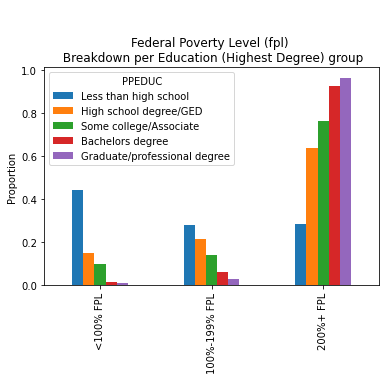

In [6]:
x_vars = ['PPEDUC']
y_vars = fin_wb_cols
plot_and_corr(cfpb_filtered_df,x_vars,y_vars)

#### Home ownership
Education Levels compared to Home Ownership

PPEDUC & HOUSING Correlation:  -0.2
PPEDUC & HOUSERANGES Correlation:  0.24
PPEDUC & MORTGAGE Correlation:  0.25


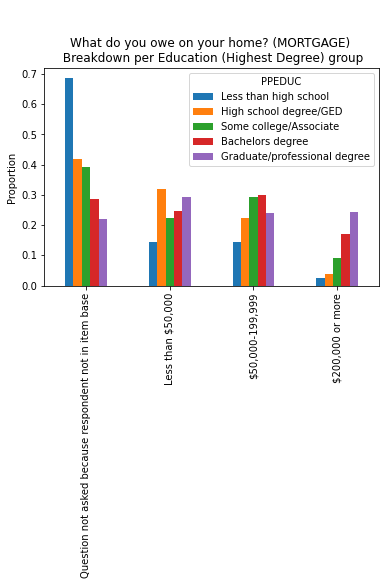

In [7]:
x_vars = ['PPEDUC']
y_vars = homeown_cols
plot_and_corr(cfpb_filtered_df,x_vars,y_vars)

PPEDUC & MORTGAGE Correlation:  0.19


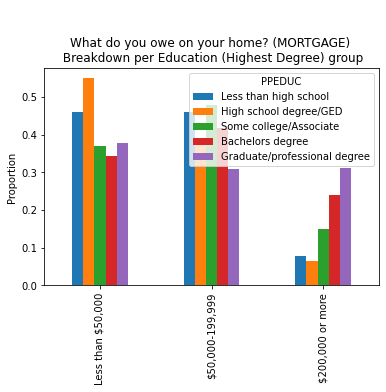

In [8]:
cfpb_filtered_df_homeowners = cfpb_filtered_df[cfpb_filtered_df['MORTGAGE']>0]
x_vars = ['PPEDUC']
y_vars = ['MORTGAGE']
plot_and_corr(cfpb_filtered_df_homeowners,x_vars,y_vars)

#### Savings
Education Levels compared to Savings

PPEDUC & SAVEHABIT Correlation:  0.26
PPEDUC & SAVINGSRANGES Correlation:  0.39


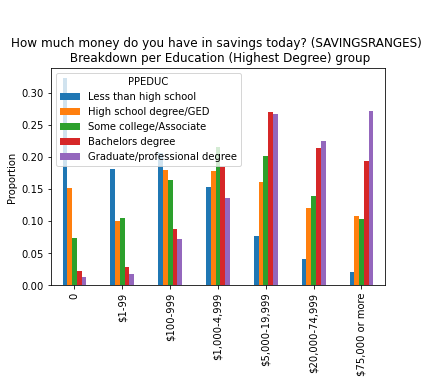

In [9]:
x_vars = ['PPEDUC']
y_vars = savings_cols
plot_and_corr(cfpb_filtered_df,x_vars,y_vars)

#### Debt
Education Levels compared to Debt

In [10]:
incomeedu_cols = ['PUF_ID','PPEDUC','PPINCIMP','fpl']
debtedu_cols = ['PUF_ID','PPEDUC','PRODHAVE_8','PRODUSE_1','PRODUSE_2','MANAGE1_1','MANAGE1_3']

In [11]:
debt_df=cfpb_filtered_df[debtedu_cols]
debt_df = debt_df.replace(value_map)
debt_df

,PUF_ID,PPEDUC,PRODHAVE_8,PRODUSE_1,PRODUSE_2,MANAGE1_1,MANAGE1_3
0,10350,Bachelors degree,No,No,No,Often,Seldom
1,7740,High school degree/GED,No,No,No,Often,Not applicable or never
2,13699,Some college/Associate,No,No,No,Sometimes,Sometimes
5,10910,Bachelors degree,Yes,No,No,Always,Always
7,7741,Less than high school,No,No,No,Not applicable or never,Not applicable or never
...,...,...,...,...,...,...,...
6386,9431,Some college/Associate,No,No,No,Always,Seldom
6388,11620,Less than high school,No,No,No,Often,Always
6389,11220,Graduate/professional degree,No,No,No,Always,Sometimes
6391,8709,Graduate/professional degree,Yes,No,No,Always,Always


In [12]:
edu_totals = debt_df.loc[:,['PUF_ID','PPEDUC']].groupby(['PPEDUC']).count().reset_index().rename(columns={'PUF_ID':'Count_Total'})
edu_vals = debt_df['PPEDUC'].unique()
edu_totals

,PPEDUC,Count_Total
0,Bachelors degree,1018
1,Graduate/professional degree,887
2,High school degree/GED,1024
3,Less than high school,248
4,Some college/Associate,1395


In [13]:
debt_pay = debt_df.loc[:,['PUF_ID','PPEDUC','PRODUSE_1']].groupby(['PPEDUC','PRODUSE_1']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
debt_pay = debt_pay.merge(edu_totals)
debt_pay['Proportion'] = debt_pay['Participant_Count'] / debt_pay['Count_Total']
debt_pay = debt_pay.set_index(['PRODUSE_1'])
debt_pay

,PPEDUC,Participant_Count,Count_Total,Proportion
PRODUSE_1,,,,
No,Bachelors degree,1002,1018,0.984283
Yes,Bachelors degree,16,1018,0.015717
No,Graduate/professional degree,881,887,0.993236
Yes,Graduate/professional degree,6,887,0.006764
No,High school degree/GED,986,1024,0.962891
Yes,High school degree/GED,38,1024,0.037109
No,Less than high school,233,248,0.939516
Yes,Less than high school,15,248,0.060484
No,Some college/Associate,1337,1395,0.958423


/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


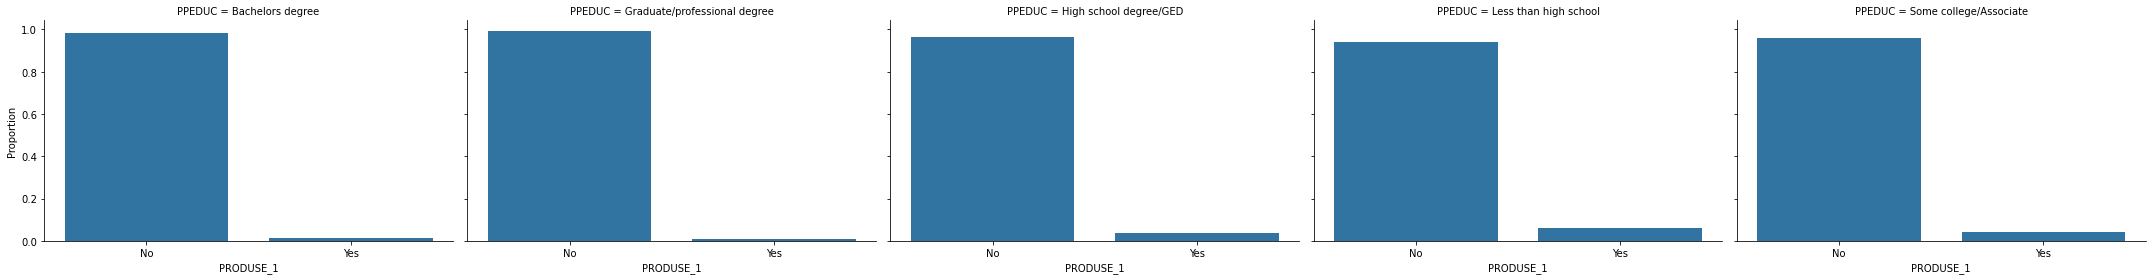

In [14]:
c = debt_pay.reset_index()
dpay_plot = sns.FacetGrid(c, col='PPEDUC', height = 4, aspect = 1.5)
dpay_plot.map(sns.barplot, 'PRODUSE_1','Proportion')
#'PRODUSE_1':'Used payday loan or cash advance loan',

In [15]:
debt_stuedu = debt_df.loc[:,['PUF_ID','PPEDUC','PRODHAVE_8']].groupby(['PPEDUC','PRODHAVE_8']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
debt_stuedu = debt_stuedu.merge(edu_totals)
debt_stuedu['Proportion'] = debt_stuedu['Participant_Count'] / debt_stuedu['Count_Total']
debt_stuedu = debt_stuedu.set_index(['PRODHAVE_8'])
debt_stuedu

,PPEDUC,Participant_Count,Count_Total,Proportion
PRODHAVE_8,,,,
No,Bachelors degree,810,1018,0.795678
Yes,Bachelors degree,208,1018,0.204322
No,Graduate/professional degree,681,887,0.767756
Yes,Graduate/professional degree,206,887,0.232244
No,High school degree/GED,960,1024,0.937500
Yes,High school degree/GED,64,1024,0.062500
No,Less than high school,235,248,0.947581
Yes,Less than high school,13,248,0.052419
No,Some college/Associate,1140,1395,0.817204


/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


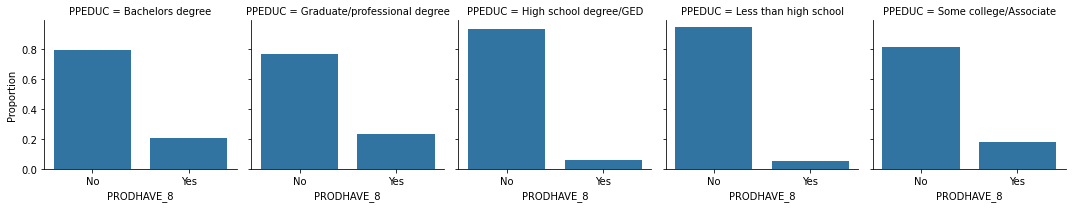

In [16]:
b = debt_stuedu.reset_index()
dstuedu_plot = sns.FacetGrid(b, col='PPEDUC')#, #height = 4, aspect = 1.5)
dstuedu_plot.map(sns.barplot, 'PRODHAVE_8','Proportion')
#PRODHAVE_8':'Student/Education Loan (for yourself or someone else)',

In [17]:
debt_paloan = debt_df.loc[:,['PUF_ID','PPEDUC','PRODUSE_2']].groupby(['PPEDUC','PRODUSE_2']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
debt_paloan = debt_paloan.merge(edu_totals)
debt_paloan['Proportion'] = debt_paloan['Participant_Count'] / debt_paloan['Count_Total']
debt_paloan = debt_paloan.set_index(['PRODUSE_2'])
debt_paloan

,PPEDUC,Participant_Count,Count_Total,Proportion
PRODUSE_2,,,,
No,Bachelors degree,1013,1018,0.995088
Yes,Bachelors degree,5,1018,0.004912
No,Graduate/professional degree,880,887,0.992108
Yes,Graduate/professional degree,7,887,0.007892
No,High school degree/GED,999,1024,0.975586
Yes,High school degree/GED,25,1024,0.024414
No,Less than high school,229,248,0.923387
Yes,Less than high school,19,248,0.076613
No,Some college/Associate,1368,1395,0.980645


/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


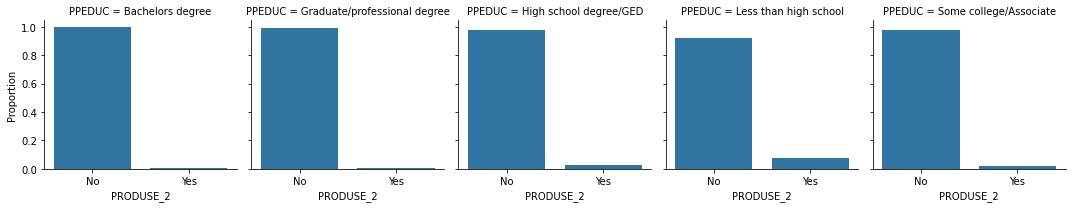

In [18]:
z = debt_paloan.reset_index()
dpaloan_plot = sns.FacetGrid(z, col='PPEDUC')#, height = 4, aspect = 1.5)
dpaloan_plot.map(sns.barplot, 'PRODUSE_2','Proportion')
#'PRODUSE_2':'Used pawn loan or auto title loan'

In [19]:
debt_paybills = debt_df.loc[:,['PUF_ID','PPEDUC','MANAGE1_1']].groupby(['PPEDUC','MANAGE1_1']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
debt_paybills = debt_paybills.merge(edu_totals)
debt_paybills['Proportion'] = debt_paybills['Participant_Count'] / debt_paybills['Count_Total']
debt_paybills = debt_paybills.set_index(['MANAGE1_1'])
debt_paybills

,PPEDUC,Participant_Count,Count_Total,Proportion
MANAGE1_1,,,,
Always,Bachelors degree,838,1018,0.823183
Not applicable or never,Bachelors degree,9,1018,0.008841
Often,Bachelors degree,119,1018,0.116896
Seldom,Bachelors degree,10,1018,0.009823
Sometimes,Bachelors degree,42,1018,0.041257
Always,Graduate/professional degree,767,887,0.864713
Not applicable or never,Graduate/professional degree,2,887,0.002255
Often,Graduate/professional degree,82,887,0.092446
Seldom,Graduate/professional degree,9,887,0.010147


/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


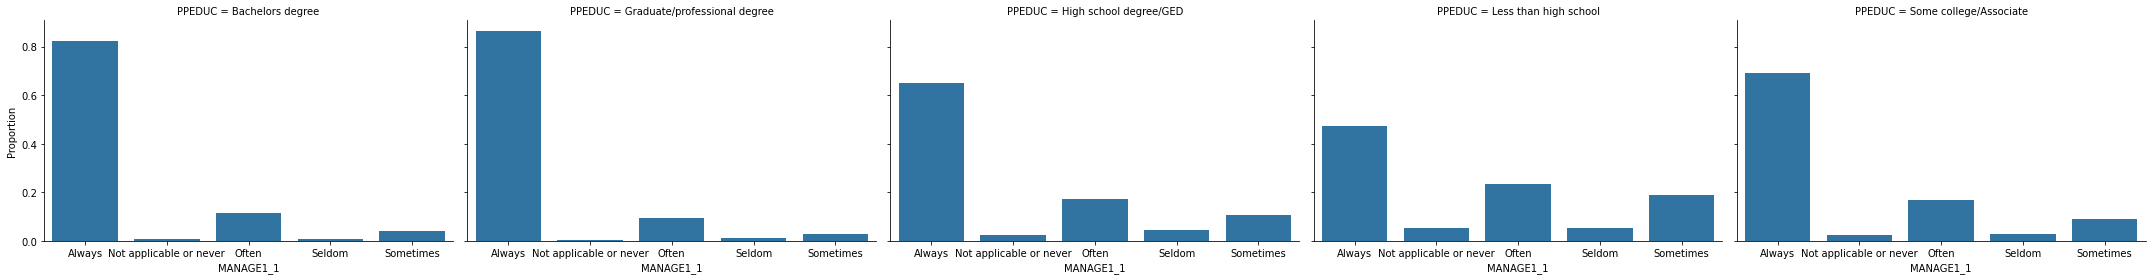

In [20]:
y = debt_paybills.reset_index()
dpaybills_plot = sns.FacetGrid(y, col='PPEDUC', height = 4, aspect = 1.5)
dpaybills_plot.map(sns.barplot, 'MANAGE1_1','Proportion')
#MANAGE1_1':'Paid all your bills on time'
    

In [21]:
debt_paycard = debt_df.loc[:,['PUF_ID','PPEDUC','MANAGE1_3']].groupby(['PPEDUC','MANAGE1_3']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
debt_paycard = debt_paycard.merge(edu_totals)
debt_paycard['Proportion'] = debt_paycard['Participant_Count'] / debt_paycard['Count_Total']
debt_paycard = debt_paycard.set_index(['MANAGE1_3'])
debt_paycard

,PPEDUC,Participant_Count,Count_Total,Proportion
MANAGE1_3,,,,
Always,Bachelors degree,569,1018,0.558939
Not applicable or never,Bachelors degree,123,1018,0.120825
Often,Bachelors degree,120,1018,0.117878
Seldom,Bachelors degree,89,1018,0.087426
Sometimes,Bachelors degree,117,1018,0.114931
Always,Graduate/professional degree,567,887,0.639233
Not applicable or never,Graduate/professional degree,66,887,0.074408
Often,Graduate/professional degree,115,887,0.129651
Seldom,Graduate/professional degree,60,887,0.067644


/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


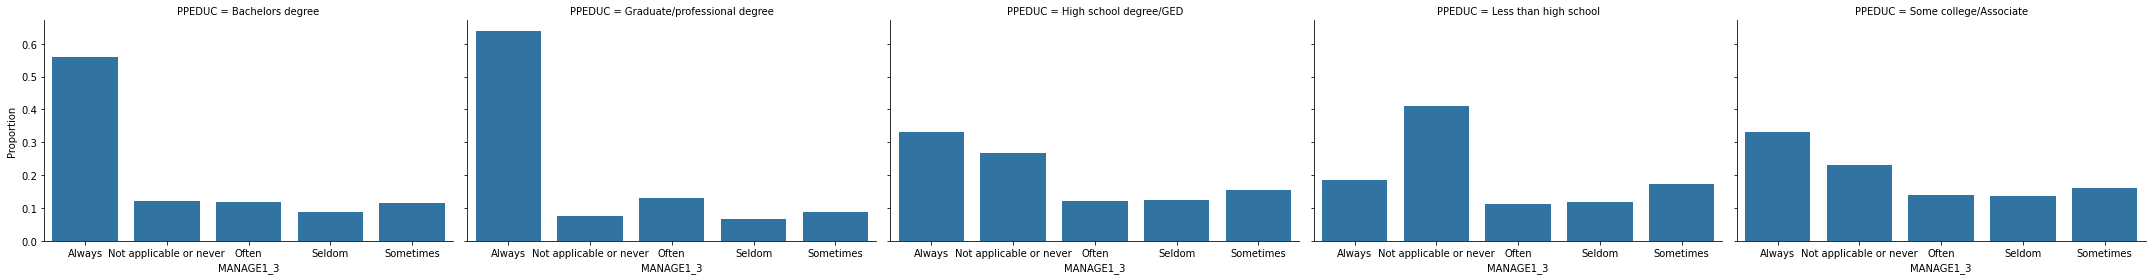

In [22]:
n = debt_paycard.reset_index()
dpaycard_plot = sns.FacetGrid(n, col='PPEDUC', height = 4, aspect = 1.5)
dpaycard_plot.map(sns.barplot, 'MANAGE1_3','Proportion')
#'MANAGE1_3':'Paid off credit card balance in full'

PPEDUC & PRODHAVE_8 Correlation:  0.16
PPEDUC & PRODUSE_1 Correlation:  -0.09
PPEDUC & PRODUSE_2 Correlation:  -0.09
PPEDUC & MANAGE1_1 Correlation:  0.23
PPEDUC & MANAGE1_3 Correlation:  0.3


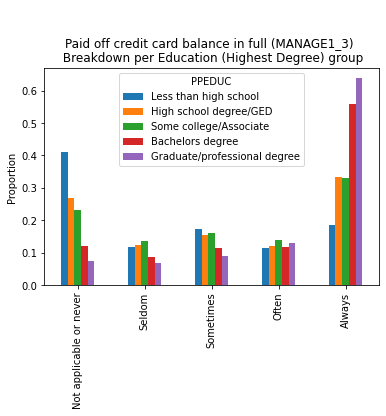

In [23]:
x_vars = ['PPEDUC']
y_vars = debt_cols
plot_and_corr(cfpb_filtered_df,x_vars,y_vars)

#### Income
Education Levels compared to Income

In [24]:
income_df= cfpb_filtered_df[incomeedu_cols]
income_df = income_df.replace(value_map)
income_df

,PUF_ID,PPEDUC,PPINCIMP,fpl
0,10350,Bachelors degree,"\$75,000 to \$99,999",200%+ FPL
1,7740,High school degree/GED,"\$60,000 to \$74,999",200%+ FPL
2,13699,Some college/Associate,"\$60,000 to \$74,999",200%+ FPL
5,10910,Bachelors degree,"\$75,000 to \$99,999",200%+ FPL
7,7741,Less than high school,"\$40,000 to \$49,999",200%+ FPL
...,...,...,...,...
6386,9431,Some college/Associate,"\$75,000 to \$99,999",200%+ FPL
6388,11620,Less than high school,"\$30,000 to \$39,999",100%-199% FPL
6389,11220,Graduate/professional degree,"\$150,000 or more",200%+ FPL
6391,8709,Graduate/professional degree,"\$150,000 or more",200%+ FPL


In [25]:
edu_inc = income_df.loc[:,['PUF_ID','PPEDUC','PPINCIMP']].groupby(['PPEDUC','PPINCIMP']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
edu_inc = edu_inc.merge(edu_totals)
edu_inc['Proportion'] = edu_inc['Participant_Count'] / edu_inc['Count_Total']
edu_inc = edu_inc.set_index(['PPINCIMP'])
edu_inc

,PPEDUC,Participant_Count,Count_Total,Proportion
PPINCIMP,,,,
"Less than \$20,000",Bachelors degree,23,1018,0.022593
"\$100,000 to \$149,999",Bachelors degree,272,1018,0.267191
"\$150,000 or more",Bachelors degree,233,1018,0.228880
"\$20,000 to \$29,999",Bachelors degree,31,1018,0.030452
"\$30,000 to \$39,999",Bachelors degree,53,1018,0.052063
"\$40,000 to \$49,999",Bachelors degree,43,1018,0.042240
"\$50,000 to \$59,999",Bachelors degree,63,1018,0.061886
"\$60,000 to \$74,999",Bachelors degree,114,1018,0.111984
"\$75,000 to \$99,999",Bachelors degree,186,1018,0.182711


/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


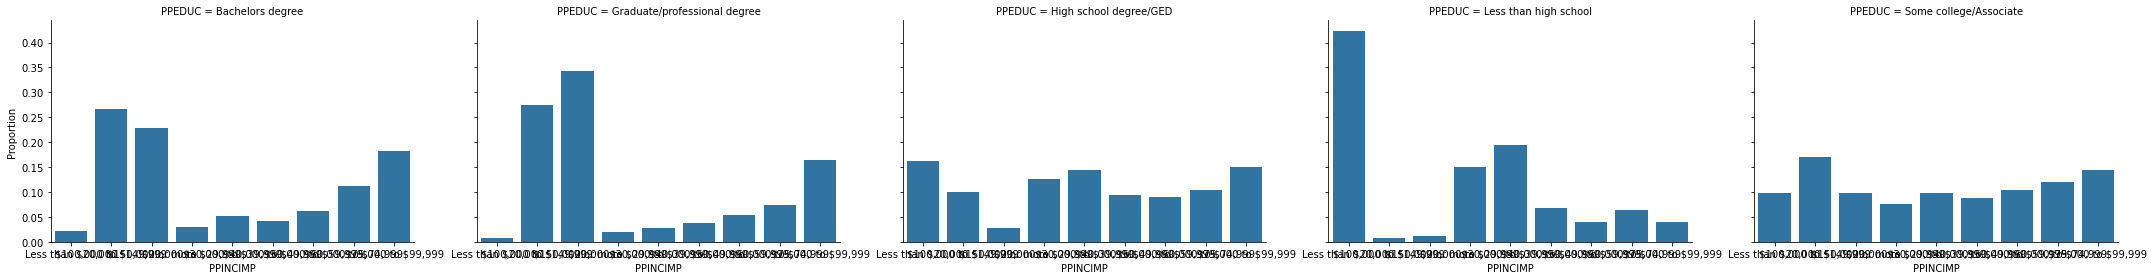

In [26]:
i = edu_inc.reset_index()
eduinc_plot = sns.FacetGrid(i, col='PPEDUC', height = 4, aspect = 1.5)
eduinc_plot.map(sns.barplot, 'PPINCIMP','Proportion')
#income

In [27]:
edu_fpl = income_df.loc[:,['PUF_ID','PPEDUC','fpl']].groupby(['PPEDUC','fpl']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
edu_fpl = edu_fpl.merge(edu_totals)
edu_fpl['Proportion'] = edu_fpl['Participant_Count'] / edu_fpl['Count_Total']
edu_fpl = edu_fpl.set_index(['fpl'])
edu_fpl

,PPEDUC,Participant_Count,Count_Total,Proportion
fpl,,,,
100%-199% FPL,Bachelors degree,61,1018,0.059921
200%+ FPL,Bachelors degree,945,1018,0.928291
<100% FPL,Bachelors degree,12,1018,0.011788
100%-199% FPL,Graduate/professional degree,24,887,0.027057
200%+ FPL,Graduate/professional degree,856,887,0.965051
<100% FPL,Graduate/professional degree,7,887,0.007892
100%-199% FPL,High school degree/GED,218,1024,0.212891
200%+ FPL,High school degree/GED,654,1024,0.638672
<100% FPL,High school degree/GED,152,1024,0.148438


/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


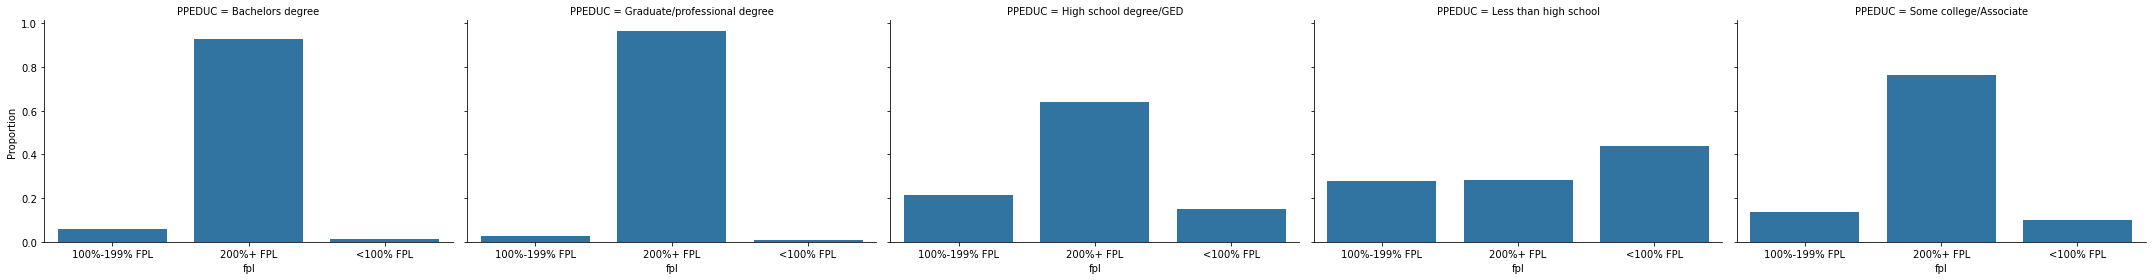

In [28]:
t = edu_fpl.reset_index()
edufpl_plot = sns.FacetGrid(t, col='PPEDUC', height = 4, aspect = 1.5)
edufpl_plot.map(sns.barplot, 'fpl','Proportion')

PPEDUC & PPINCIMP Correlation:  0.5


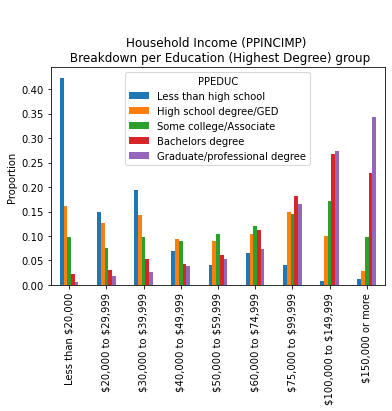

In [29]:
x_vars = ['PPEDUC']
y_vars = income_cols
plot_and_corr(cfpb_filtered_df,x_vars,y_vars)

#### == Key Findings ==
Are there differences among the different education levels? Is there a possible explanation or reasoning for such differences or lack of differences?

* **Education Levels compared to Financial Well-Being Scores**:
    * Median financial well-being scores trend up the higher the education level; this association has a correlation coefficient of 0.3. 
    * The higher the education level, the higher the proportion of folks that think they can handle a major unexpected expense; this association has a correlation coefficient of 0.3. Within the "High School Degree/GED" and "Some College/Associate" education levels, the proportions of the responses followed a rough bell-curve. Within the  "Less than high school" education level, the proportions of responses were more concentrated to the left, meaning a smaller proportion of folks with "Less than high school" education are able to handle a major unexpected expense. Contrastly, the proportions of responses among folks with a "Bachelors degree" and those with a "Graduate/professional degree" are concentrated to the right, meaning that a higher proportion of folks with a higher-education are able to handle a major unexpected expense.
    * The higher the education level, the smaller the proportion of folks that think they are just getting by financially; this association has a correlation coefficient of -0.23. Within the "High School Degree/GED" and "Some College/Associate" education levels, the proportions of the responses followed a rough bell-curve. Within the "Less than high school" education level, the proportions of responses were more concentrated to the right, meaning a higher proportion of folks with "Less than high school" education are just getting by financially. Contrastly, the proportions of responses among folks with a "Bachelors degree" and those with a "Graduate/professional degree" are concentrated to the left, meaning that a smaller proportion of folks with a higher-education are just getting by financially.
    * The higher the education level, the higher the proportion of folks that are above the Federal Poverty Level; this association has a correlation coefficient of 0.39. For folks with a high-school degree / GED or higher, we can see that the proportion of folks increases as we move up the federal poverty levels. The only education level that does not follow that pattern is the folks with "Less than high school" education level; the proportion of folks decreases as we move up the federal poverty levels.
* **Education Levels compared to Home Ownership**:
    * The higher the education-level, the higher the proportion of folks that own a home. Another thing to note is that the proportion of folks with "Less than high school" education that own a home seems to be drastically low compared to any of the other education-level groups; similarly, this group also seems to have a pretty high proportion that rents their home, compared to the other education-level groups.
    * The higher the education-level, the higher the proportion of folks that pay more for their home each month. One thing to note is that across all education levels, there seems to be a rough proportion of 0.20 that pay less than \\$300 a month irrespective of education level.
    * Among homeowners, across education levels, a great proportion of folks owes <\\$200K on their home. The proportion of folks with “Less than high school” are almost evenly split between owing <\\$50K and owing between \\$50K - \\$200K for their homes. Folks with a “High school degree/GED” are concentrated in the <\\$50K category, while folks with “Some college/Associate” and a “Bachelors degree” are concentrated in the between \\$50K - \\$200K category. Folks with a “Graduate/professional degree” are more evenly split across all three categories of mortgage amount, with a slightly higher concentration in the category of owing <\\$50K for their home. The only visible difference is within the folks that owe >\\$200K for their home; for the most part, the higher the education level, the higher the proportion of folks that owe this amount of mortgage on their home.
* **Education Levels compared to Savings**:
    * The higher the education level, the higher the proportion of folks that think that putting money into savings is a habit for them; the correlation coefficient for this association is 0.26. For folks with a high school degree or higher, there seems to be a general concentration of proportions to the right. The only group that doesn’t follow this pattern is the folks with less than a high school degree; proportions follow a bell-curve more closely.
    * The higher the education level, the higher the amount of money folks have in their savings; this association holds a correlation coefficient of 0.39.
* **Education Levels compared to Income**: 
    * The higher the education level, the higher the household income; this association holds a correlation coefficient of 0.5. A high proportion of folks with “Less than high school” are concentrated in the <\$20K income bracket, while a high proportion of folks with a “Bachelors degree” and a “Graduate/professional degree” are concentrated in the upper income brackets. 
* **Education Levels compared to Debt**: 
    * There is a higher proportion of folks that have taken out student/education loans (for themselves or someone else), among college-educated folks.
    * There is a higher proportion of folks that have taken out payday loans, cash advance loans, pawn loans, and/or auto title loans, among folks with less than high school education.
    * There is a general concentration of folks that have paid their bills on time most of the time, irrespective of their education level. There does seem to be a pattern showing that the higher the education level, the higher the frequency that folks paid their bills on time.
    * Among folks with “Less than high school” education, there is a higher proportion of folks that never or seldom have paid off their credit card balance in full. Conversely, we see that a higher proportion of folks with a “Bachelors degree” or higher have always paid off their credit card balance in full. Folks with a “High school degree / GED” or “Some college / Associate” vary, with higher proportions on either end, either never paying off their credit card balance in full or always paying their credit card balance in full.


....................................................................................................................................................................................................................................................


## Are there *significant* differences among the different education levels?

In [30]:
# Perform chi-tests

#### == Key Findings ==

....................................................................................................................................................................................................................................................

## Are there additional factors involved in these observations? Is there additional data we can explore?

In [31]:
# Look at other demographic variable(s) to see other key differences among folks

### Association of race/ethnicity to key financial success indicators

#### Financial Well-Being
Racial/Ethnic breakdown of Financial Well-Being Scores

PPETHM & FWBscore Correlation:  -0.14
PPETHM & FWB1_1 Correlation:  -0.1
PPETHM & FWB1_5 Correlation:  0.1
PPETHM & fpl Correlation:  -0.24


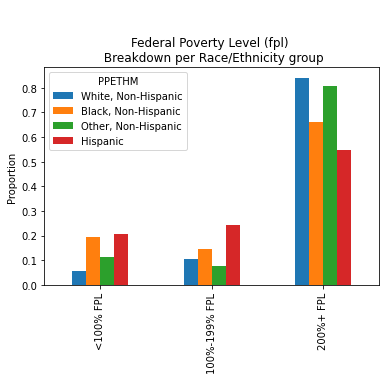

In [32]:
x_vars = ['PPETHM']
y_vars = fin_wb_cols
plot_and_corr(cfpb_filtered_df,x_vars,y_vars)

#### Home ownership
Racial/Ethnic breakdown of Home Ownership

PPETHM & HOUSING Correlation:  0.21
PPETHM & HOUSERANGES Correlation:  0.06
PPETHM & MORTGAGE Correlation:  -0.21


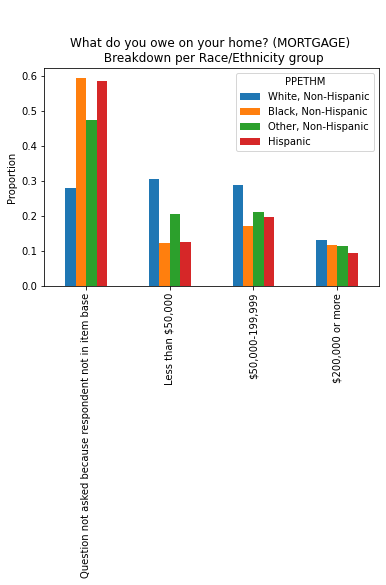

In [33]:
x_vars = ['PPETHM']
y_vars = homeown_cols
plot_and_corr(cfpb_filtered_df,x_vars,y_vars)

PPETHM & MORTGAGE Correlation:  0.07


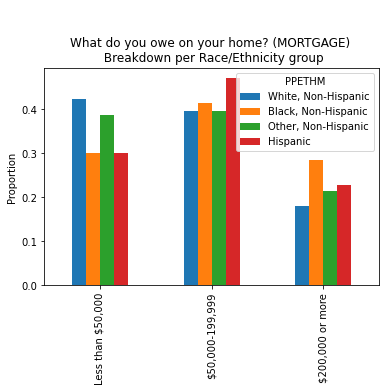

In [34]:
cfpb_filtered_df_homeowners = cfpb_filtered_df[cfpb_filtered_df['MORTGAGE']>0]
x_vars = ['PPETHM']
y_vars = ['MORTGAGE']
plot_and_corr(cfpb_filtered_df_homeowners,x_vars,y_vars)

#### Savings
Racial/Ethnic breakdown of Savings

PPETHM & SAVEHABIT Correlation:  -0.04
PPETHM & SAVINGSRANGES Correlation:  -0.19


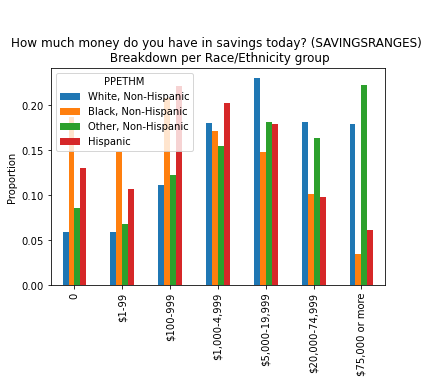

In [33]:
x_vars = ['PPETHM']
y_vars = savings_cols
plot_and_corr(cfpb_filtered_df,x_vars,y_vars)

#### Debt
Racial/Ethnic breakdown of Debt

PPETHM & PRODHAVE_8 Correlation:  0.02
PPETHM & PRODUSE_1 Correlation:  0.08
PPETHM & PRODUSE_2 Correlation:  0.08
PPETHM & MANAGE1_1 Correlation:  -0.14
PPETHM & MANAGE1_3 Correlation:  -0.12


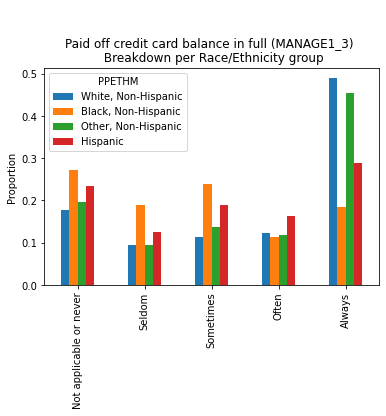

In [34]:
x_vars = ['PPETHM']
y_vars = debt_cols
plot_and_corr(cfpb_filtered_df,x_vars,y_vars)

#### Income
Racial/Ethnic breakdown of Income

PPETHM & PPINCIMP Correlation:  -0.19


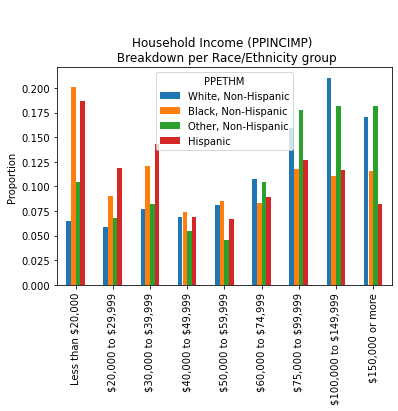

In [36]:
x_vars = ['PPETHM']
y_vars = income_cols
plot_and_corr(cfpb_filtered_df,x_vars,y_vars)

#### == Key Findings ==
Are there differences among the different racial/ethnic groups? Is there a possible explanation or reasoning for such differences or lack of differences?

* Racial/Ethnic breakdown of Financial Well-Being Scores: 
    * The median financial well-being score is lower among “Black, Non-Hispanic” and “Hispanic” participants.
    * The proportion of responses to “I could handle a major unexpected expense” follows a rough bell curve across all racial/ethnic groups. There seems to be just a slightly higher concentration of “White, Non-Hispanic” and “Other, Non-Hispanic” folks to the right of the scale, meaning there is a slightly higher proportion of these folks that can handle a major unexpected expense.
    * The proportion of responses to “I am just getting by financially” follows a rough bell curve across all racial/ethnic groups, with a slightly higher proportion of “White, Non-Hispanic” and “Other, Non-Hispanic” to the left of the scale. This means there is a slightly lower proportion of these folks that are just getting by financially, compared to “Black, Non-Hispanic” and “Hispanic” participants.
    * There is a higher proportion of “Black, Non-Hispanic” and “Hispanic” participants that are below the Federal Poverty Level. Conversely, there is a clear divide in proportions within the 200% or more above the Federal Poverty Level;  there is a much lower proportion of “Black, Non-Hispanic” and “Hispanic” participants in this category, compared to “White, Non-Hispanic” and “Other, Non-Hispanic”.
* Racial/Ethnic breakdown of Home Ownership: 
    * “White, Non-Hispanic” participants have the highest proportion to own a home, followed by “Other, Non-Hispanic” participants. “Black, Non-Hispanic” and “Hispanic” participants have the lowest proportion of folks that own a home; participants in these racial/ethnic categories also have the highest proportion of folks that rent their home.
    * HOUSERANGES
    * MORTGAGE
* Racial/Ethnic breakdown of Savings: 
    * Across racial/ethnic groups, there seems to be a general concentration of proportions where folks agree that putting savings is a habit for them.
    * There is a higher proportion of “Black, Non-Hispanic” and “Hispanic” participants that have less than \\$1,000 in savings, compared to “White, Non-Hispanic” and “Other, Non-Hispanic” participants. Conversely, there is a higher proportion of “White, Non-Hispanic” and “Other, Non-Hispanic” participants that have \\$20,000 or more in savings, compared to “Black, Non-Hispanic” and “Hispanic” participants.
* Racial/Ethnic breakdown of Income: 
    * There is a higher proportion of  “Black, Non-Hispanic” and “Hispanic” participants that have a household income less than \\$50K. Conversely, there is a higher proportion of “White, Non-Hispanic” and “Other, Non-Hispanic” participants that have a household income greater than \\$60K. There is a general concentration of  “Black, Non-Hispanic” and “Hispanic” participants on the lower end of the income spectrum, while there is a general concentration of “White, Non-Hispanic” and “Other, Non-Hispanic” participants on the higher end of the income spectrum.
* Racial/Ethnic breakdown of Debt: 
    * Among all racial/ethnic groups, “Black, Non-Hispanic” participants had the highest proportion to have used payday, cash advance, pawn, and/or auto title loans.
    * BILLS
    * There is a higher proportion of “White, Non-Hispanic” and “Other, Non-Hispanic” participants that have “Always” paid off their credit card balance in full, compared to  “Black, Non-Hispanic” and “Hispanic” participants.

....................................................................................................................................................................................................................................................


### Association of education to key financial success indicators, by race/ethnicity

#### Financial Well-Being
Education compared to Financial Well-Being Scores, by race/ethnicity


Sub-population observed:  White, Non-Hispanic
PPEDUC & FWBscore Correlation:  0.29
PPEDUC & FWB1_1 Correlation:  0.31
PPEDUC & FWB1_5 Correlation:  -0.23
PPEDUC & fpl Correlation:  0.34

Sub-population observed:  Black, Non-Hispanic
PPEDUC & FWBscore Correlation:  0.29
PPEDUC & FWB1_1 Correlation:  0.21
PPEDUC & FWB1_5 Correlation:  -0.19
PPEDUC & fpl Correlation:  0.49

Sub-population observed:  Other, Non-Hispanic
PPEDUC & FWBscore Correlation:  0.41
PPEDUC & FWB1_1 Correlation:  0.47
PPEDUC & FWB1_5 Correlation:  -0.26
PPEDUC & fpl Correlation:  0.41

Sub-population observed:  Hispanic
PPEDUC & FWBscore Correlation:  0.2
PPEDUC & FWB1_1 Correlation:  0.14
PPEDUC & FWB1_5 Correlation:  -0.13
PPEDUC & fpl Correlation:  0.41


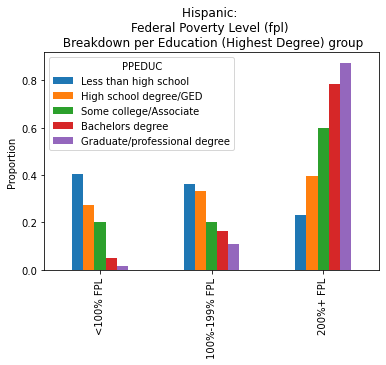

In [46]:
x_vars = ['PPEDUC'] # Education
y_vars = fin_wb_cols
sub_pop = ['PPETHM'] # Race/Ethnicity
plot_and_corr(cfpb_filtered_df,x_vars,y_vars,sub_pop)

#### Home ownership
Education compared to Home Ownership, by race/ethnicity


Sub-population observed:  White, Non-Hispanic
PPEDUC & HOUSING Correlation:  -0.15
PPEDUC & HOUSERANGES Correlation:  0.24
PPEDUC & MORTGAGE Correlation:  0.21

Sub-population observed:  Black, Non-Hispanic
PPEDUC & HOUSING Correlation:  -0.3
PPEDUC & HOUSERANGES Correlation:  0.37
PPEDUC & MORTGAGE Correlation:  0.29

Sub-population observed:  Other, Non-Hispanic
PPEDUC & HOUSING Correlation:  -0.21
PPEDUC & HOUSERANGES Correlation:  0.35
PPEDUC & MORTGAGE Correlation:  0.22

Sub-population observed:  Hispanic
PPEDUC & HOUSING Correlation:  -0.18
PPEDUC & HOUSERANGES Correlation:  0.24
PPEDUC & MORTGAGE Correlation:  0.26


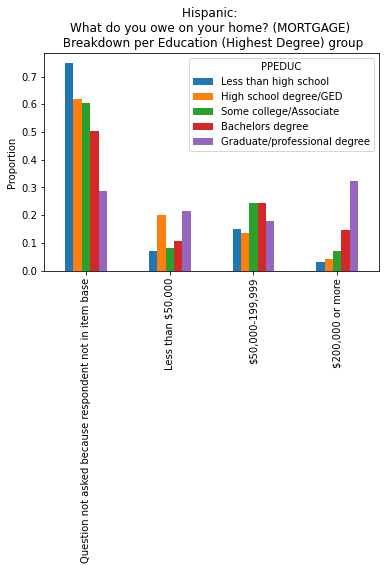

In [47]:
x_vars = ['PPEDUC'] # Education
y_vars = homeown_cols
sub_pop = ['PPETHM'] # Race/Ethnicity
plot_and_corr(cfpb_filtered_df,x_vars,y_vars,sub_pop)


Sub-population observed:  White, Non-Hispanic
PPEDUC & MORTGAGE Correlation:  0.2

Sub-population observed:  Black, Non-Hispanic
PPEDUC & MORTGAGE Correlation:  0.16

Sub-population observed:  Other, Non-Hispanic
PPEDUC & MORTGAGE Correlation:  0.17

Sub-population observed:  Hispanic
PPEDUC & MORTGAGE Correlation:  0.22


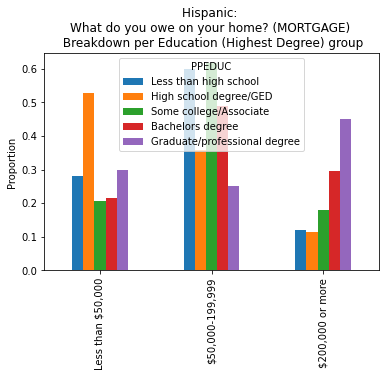

In [35]:
cfpb_filtered_df_homeowners = cfpb_filtered_df[cfpb_filtered_df['MORTGAGE']>0]
x_vars = ['PPEDUC']
y_vars = ['MORTGAGE']
sub_pop = ['PPETHM']
plot_and_corr(cfpb_filtered_df_homeowners,x_vars,y_vars,sub_pop)

#### Savings
Education compared to Savings, by race/ethnicity


Sub-population observed:  White, Non-Hispanic
PPEDUC & SAVEHABIT Correlation:  0.28
PPEDUC & SAVINGSRANGES Correlation:  0.36

Sub-population observed:  Black, Non-Hispanic
PPEDUC & SAVEHABIT Correlation:  0.21
PPEDUC & SAVINGSRANGES Correlation:  0.44

Sub-population observed:  Other, Non-Hispanic
PPEDUC & SAVEHABIT Correlation:  0.4
PPEDUC & SAVINGSRANGES Correlation:  0.55

Sub-population observed:  Hispanic
PPEDUC & SAVEHABIT Correlation:  0.09
PPEDUC & SAVINGSRANGES Correlation:  0.33


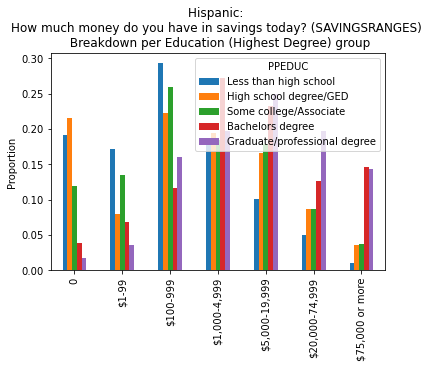

In [48]:
x_vars = ['PPEDUC'] # Education
y_vars = savings_cols
sub_pop = ['PPETHM'] # Race/Ethnicity
plot_and_corr(cfpb_filtered_df,x_vars,y_vars,sub_pop)

#### Debt
Education Levels compared to Debt, by race/ethnicity


Sub-population observed:  White, Non-Hispanic
PPEDUC & PRODHAVE_8 Correlation:  0.15
PPEDUC & PRODUSE_1 Correlation:  -0.08
PPEDUC & PRODUSE_2 Correlation:  -0.07
PPEDUC & MANAGE1_1 Correlation:  0.23
PPEDUC & MANAGE1_3 Correlation:  0.3

Sub-population observed:  Black, Non-Hispanic
PPEDUC & PRODHAVE_8 Correlation:  0.27
PPEDUC & PRODUSE_1 Correlation:  -0.11
PPEDUC & PRODUSE_2 Correlation:  -0.09
PPEDUC & MANAGE1_1 Correlation:  0.19
PPEDUC & MANAGE1_3 Correlation:  0.28

Sub-population observed:  Other, Non-Hispanic
PPEDUC & PRODHAVE_8 Correlation:  0.09
PPEDUC & PRODUSE_1 Correlation:  -0.06
PPEDUC & PRODUSE_2 Correlation:  -0.2
PPEDUC & MANAGE1_1 Correlation:  0.26
PPEDUC & MANAGE1_3 Correlation:  0.45

Sub-population observed:  Hispanic
PPEDUC & PRODHAVE_8 Correlation:  0.22
PPEDUC & PRODUSE_1 Correlation:  -0.05
PPEDUC & PRODUSE_2 Correlation:  -0.1
PPEDUC & MANAGE1_1 Correlation:  0.19
PPEDUC & MANAGE1_3 Correlation:  0.12


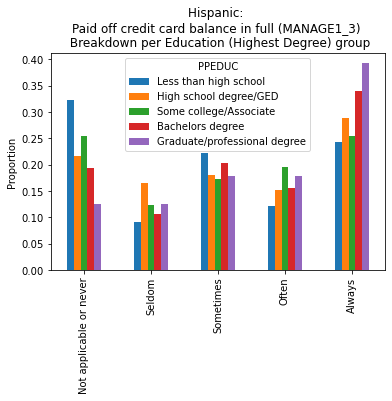

In [49]:
x_vars = ['PPEDUC'] # Education
y_vars = debt_cols
sub_pop = ['PPETHM'] # Race/Ethnicity
plot_and_corr(cfpb_filtered_df,x_vars,y_vars,sub_pop)

#### Income
Education Levels compared to Income, by race/ethnicity


Sub-population observed:  White, Non-Hispanic
PPEDUC & PPINCIMP Correlation:  0.48

Sub-population observed:  Black, Non-Hispanic
PPEDUC & PPINCIMP Correlation:  0.54

Sub-population observed:  Other, Non-Hispanic
PPEDUC & PPINCIMP Correlation:  0.56

Sub-population observed:  Hispanic
PPEDUC & PPINCIMP Correlation:  0.47


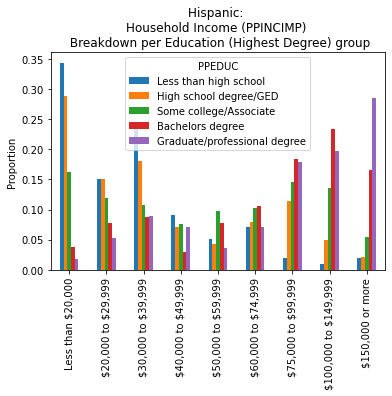

In [50]:
x_vars = ['PPEDUC'] # Education
y_vars = income_cols
sub_pop = ['PPETHM'] # Race/Ethnicity
plot_and_corr(cfpb_filtered_df,x_vars,y_vars,sub_pop)

#### == Key Findings ==
Are there differences among the different racial/ethnic groups? Is there a possible explanation or reasoning for such differences or lack of differences?

* **Racial/Ethnic breakdown of Education to Financial Well-Being Scores:**
    * 
* **Racial/Ethnic breakdown of Education to Home Ownership:**
    * 
* **Racial/Ethnic breakdown of Education to Savings:**
    * 
* **Racial/Ethnic breakdown of Education to Income:**
    * 
* **Racial/Ethnic breakdown of Education to Debt:**
    * 

....................................................................................................................................................................................................................................................

....................................................................................................................................................................................................................................................
# Conclusions
....................................................................................................................................................................................................................................................

### What conclusions can we draw?

### Are there any recommendations we can make to public and private institutions to efficiently allocate resources to make the largest difference for the groups observed?